In [7]:
#!/usr/bin/env python
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pickle
import os

sns.set_style("white")

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def get_pickle_file(title, pickle_dir):
    pickle_file = os.path.join(pickle_dir, "{}.pickle".format(title))
    return pickle_file

def pickle_scalar(events_file, scalar, title, pickle_dir):
    vals = []
    for e in tf.train.summary_iterator(events_file):
        for v in e.summary.value:
            if v.tag == scalar:
                vals.append(v.simple_value)
                if len(vals) % 1000 == 0:
                    pickle_file = get_pickle_file(title, pickle_dir)
                    print "Pickling {} with {} vals...".format(pickle_file, len(vals))
                    with open(pickle_file, 'wb') as handle:
                        pickle.dump(vals, handle, protocol=pickle.HIGHEST_PROTOCOL)
                    print "Done pickling."

def get_batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

def plot_scalar(events_file, scalar, title, plot_dir, pickle_dir, force_pickle=False, num_batches=5):
    pickle_file = get_pickle_file(title, pickle_dir)
    if not os.path.exists(pickle_file) or force_pickle:
        #pickle_scalar(events_file, scalar, title, pickle_dir)
        try:-
            pickle_scalar(events_file, scalar, title, pickle_dir)
        except:
            pass

    with open(pickle_file, 'rb') as handle:
        vals = pickle.load(handle)

    batches = []
    batch_size = len(vals) / num_batches
    min_bin = float("inf")
    max_bin = 0
    for x in get_batch(vals, batch_size):
        batches.append(x)
        if max(x) > max_bin:
            max_bin = int(max(x))
        if min(x) < min_bin:
            min_bin = int(min(x))

    #fig = plt.figure(figsize=(40, 16))
    rows = 1
    cols = len(batches)
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows), sharex=True, sharey=True)

    num_bins = 500

    for i in range(len(batches)):

        ax = axes[i]
        batch = batches[i]

        print "{}: {} vals, {} bins".format(title, len(batch), num_bins)
        n, bins, patches = ax.hist(batch, num_bins, normed=0, facecolor='green', alpha=0.75, range=(min_bin, max_bin))
        #plt.title(title, fontsize=15)
        #plt.xlabel(scalar, fontsize=15)
        #plt.ylabel("Frequency", fontsize=15)

    plt.xscale("log")
    plt.tight_layout()
    plot_file = os.path.join(plot_dir, "{}-split{}.png".format(title, num_batches))
    plt.savefig(plot_file)
    plt.show()
    plt.clf()



gradient_norm.flowers.inception: 1800 vals, 500 bins
gradient_norm.flowers.inception: 1800 vals, 500 bins
gradient_norm.flowers.inception: 1800 vals, 500 bins
gradient_norm.flowers.inception: 1800 vals, 500 bins
gradient_norm.flowers.inception: 1800 vals, 500 bins


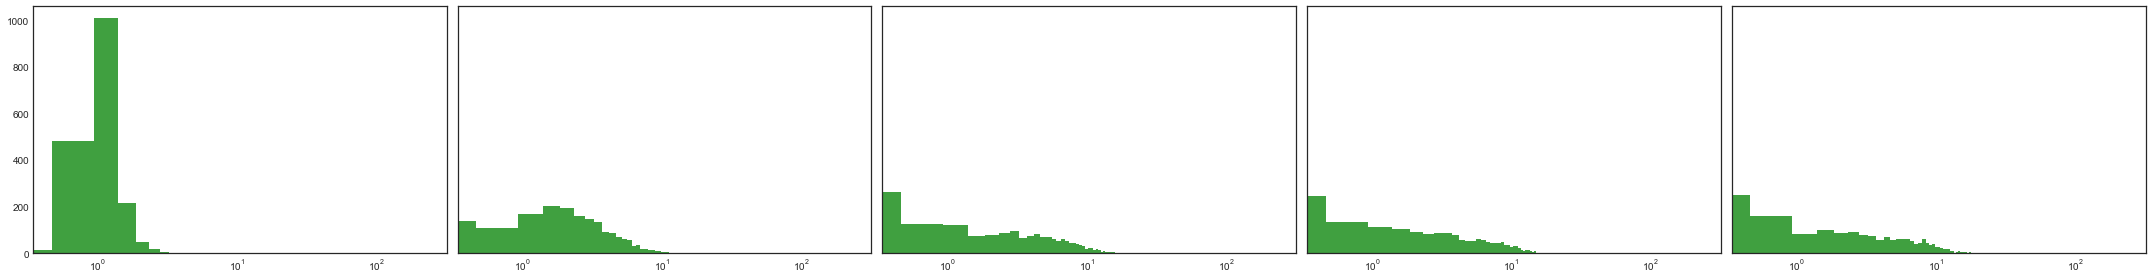

gradient_norm.bus.inception: 2000 vals, 500 bins
gradient_norm.bus.inception: 2000 vals, 500 bins
gradient_norm.bus.inception: 2000 vals, 500 bins
gradient_norm.bus.inception: 2000 vals, 500 bins
gradient_norm.bus.inception: 2000 vals, 500 bins


<Figure size 432x288 with 0 Axes>

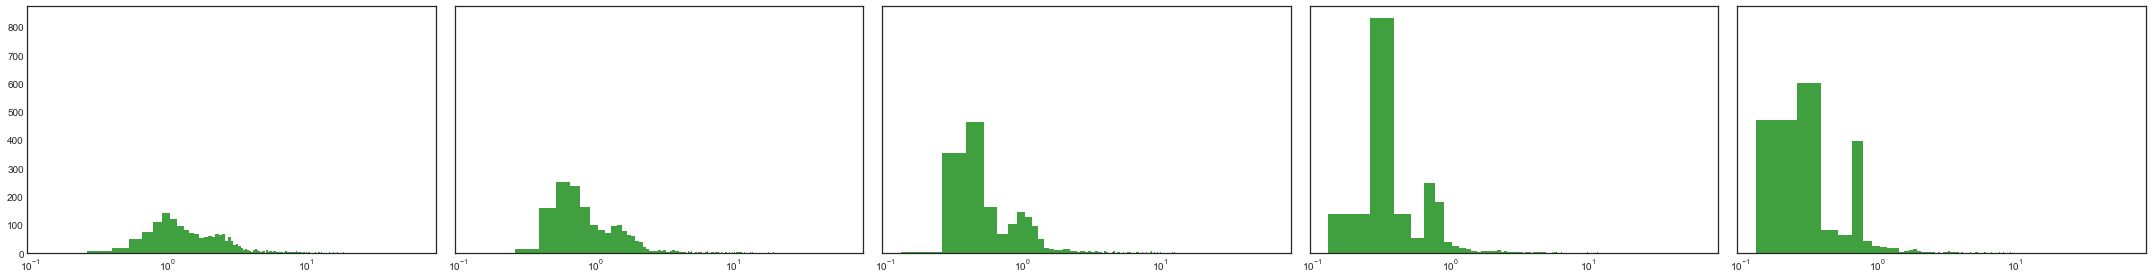

gradient_norm.imagenet_validation.inception: 2000 vals, 500 bins
gradient_norm.imagenet_validation.inception: 2000 vals, 500 bins
gradient_norm.imagenet_validation.inception: 2000 vals, 500 bins
gradient_norm.imagenet_validation.inception: 2000 vals, 500 bins
gradient_norm.imagenet_validation.inception: 2000 vals, 500 bins


<Figure size 432x288 with 0 Axes>

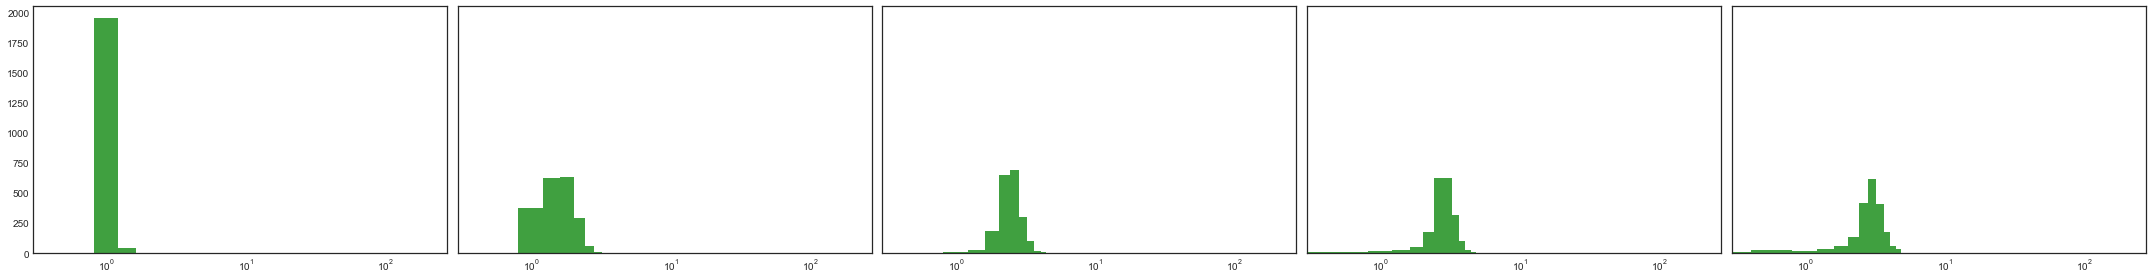

gradient_norm.cifar10.resnet: 25000 vals, 500 bins
gradient_norm.cifar10.resnet: 25000 vals, 500 bins
gradient_norm.cifar10.resnet: 25000 vals, 500 bins
gradient_norm.cifar10.resnet: 25000 vals, 500 bins
gradient_norm.cifar10.resnet: 25000 vals, 500 bins


<Figure size 432x288 with 0 Axes>

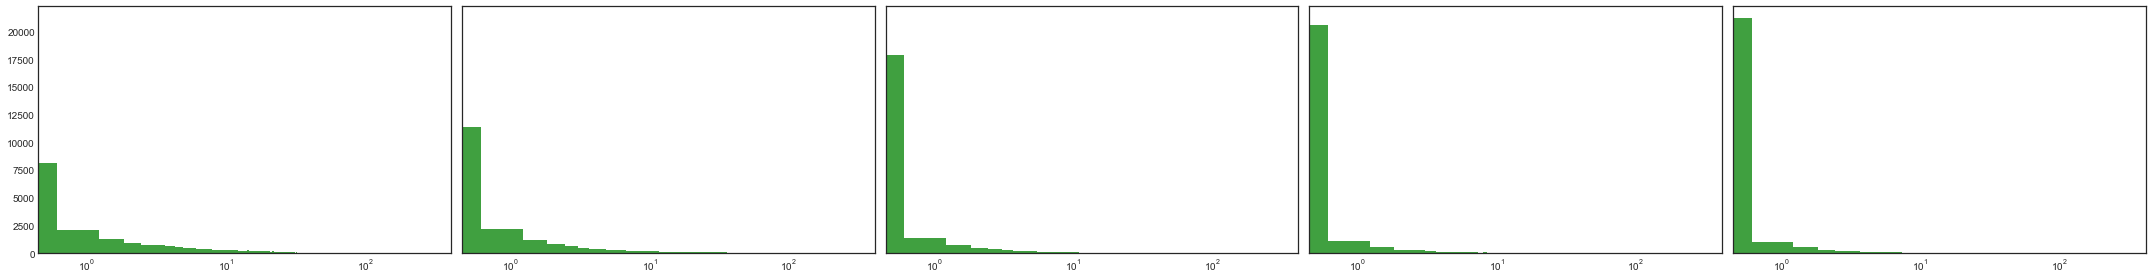

<Figure size 432x288 with 0 Axes>

In [9]:
#### plot_dir = "../plots"
pickle_dir = "../data/pickle"
force_pickle = False

flowers_event = "/tmp/flowers_train_narwhal/events.out.tfevents.1535641129.h0.bias.biglearning.narwhal.pdl.cmu.edu"
imagenet_event = "/tmp/imagenet_validation_narwhal/events.out.tfevents.1535641047.h0.bias-2.biglearning.narwhal.pdl.cmu.edu"
cifar10_event = "/tmp/cifar10_resnet_narwhal/events.out.tfevents.1535640819.h1.bias-2.biglearning.narwhal.pdl.cmu.edu"
bus_event = "/tmp/bus_inception_narwhal/events.out.tfevents.1535640767.h0.bias-4.biglearning.narwhal.pdl.cmu.edu"

scalars = ["tower_0/gradient_norm"]
title = "gradient_norm.flowers.inception"
plot_scalar(flowers_event, scalars[0], title, plot_dir, pickle_dir, force_pickle)

title = "gradient_norm.bus.inception"
plot_scalar(bus_event, scalars[0], title, plot_dir, pickle_dir, force_pickle)

title = "gradient_norm.imagenet_validation.inception"
plot_scalar(imagenet_event, scalars[0], title, plot_dir, pickle_dir, force_pickle)

scalars = ["gradient_norm"]
title = "gradient_norm.cifar10.resnet"
plot_scalar(cifar10_event, scalars[0], title, plot_dir, pickle_dir, force_pickle)
